<a href="https://colab.research.google.com/github/rmartinezra/Simpytutorial/blob/main/SymPy_Tutorial_Desde_Cero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Tutorial de **SymPy** desde cero

Este cuaderno guía, paso a paso, el uso de **SymPy** para **cálculo simbólico** en Python.
Incluye desde lo básico (símbolos y expresiones) hasta temas intermedios (cálculo, álgebra lineal,
ecuaciones diferenciales, series, transformadas, impresión LaTeX, etc.).

> Requisitos: Python 3.10+ y `sympy` instalado. Si no lo tienes, ejecuta la celda de instalación.


In [63]:

# (Opcional) Instalar SymPy si aún no lo tienes.
# Descomenta la siguiente línea en tu entorno local si es necesario.
# !pip install sympy


In [64]:

import sympy as sp
sp.__version__


'1.13.3'


## 1. Conceptos básicos: símbolos, expresiones y evaluación

- **Símbolos**: variables algebraicas abstractas (`x`, `y`, `a`, etc.).  
- **Expresiones**: combinaciones de símbolos, números y operaciones.  
- **Evaluación**: sustitución, simplificación y conversión a valores numéricos.


In [65]:

# Crear símbolos
x, y, a, b = sp.symbols('x y a b')
alpha, beta = sp.symbols('alpha beta', real=True)

# Crear expresiones
expr1 = x**2 + 2*x + 1
expr2 = sp.sin(x) * sp.exp(y) + sp.Rational(1, 3)

expr1, expr2


⎛ 2             y          1⎞
⎜x  + 2⋅x + 1, ℯ ⋅sin(x) + ─⎟
⎝                          3⎠

In [66]:

# Sustitución (subs) y evaluación numérica (N o .evalf())
expr = (x + 1)**3
expr_sub = expr.subs(x, 2)        # Sustituye x=2
expr_num = sp.N(sp.pi)            # Aproxima pi
expr_evalf = (sp.sqrt(2)).evalf(50)  # Precisión con 50 dígitos

expr, expr_sub, expr_num, expr_evalf


⎛       3                                                                      ↪
⎝(x + 1) , 27, 3.14159265358979, 1.4142135623730950488016887242096980785696718 ↪

↪       ⎞
↪ 753769⎠

In [67]:

# Simplificaciones comunes
expr_expand = sp.expand((x+1)**3)             # expandir
expr_factor = sp.factor(x**3 - 1)             # factorizar
expr_simplify = sp.simplify(sp.sin(x)**2 + sp.cos(x)**2)
expr_trig = sp.trigsimp(sp.sin(x)**2 + sp.cos(x)**2)

expr_expand, expr_factor, expr_simplify, expr_trig


⎛ 3      2                    ⎛ 2        ⎞      ⎞
⎝x  + 3⋅x  + 3⋅x + 1, (x - 1)⋅⎝x  + x + 1⎠, 1, 1⎠


### Impresión bonita y LaTeX

- `sp.pretty` imprime en texto legible.  
- `sp.latex` genera código LaTeX.  


In [68]:

expr = sp.sin(x)**2 + sp.cos(x)**2
print(sp.pretty(expr))
sp.latex(expr)


   2         2   
sin (x) + cos (x)


'\\sin^{2}{\\left(x \\right)} + \\cos^{2}{\\left(x \\right)}'

In [69]:
from sympy import sin, cos, symbols, latex
from IPython.display import display, Math

x = symbols('x')
expr = sin(x)**2 + cos(x)**2

display(Math(latex(expr)))


<IPython.core.display.Math object>

In [70]:
sp.init_printing(use_latex=True)

x = sp.symbols('x')
expr = sp.sin(x)**2 + sp.cos(x)**2
expr

   2         2   
sin (x) + cos (x)


## 2. Suposiciones (assumptions)

Las **suposiciones** sobre símbolos (real, positivo, entero, etc.) guían a SymPy
en simplificaciones y soluciones.


In [71]:

p = sp.symbols('p', positive=True)
q = sp.symbols('q', real=True)
r = sp.symbols('r', integer=True)

test_expr = sp.sqrt(p**2)
sp.simplify(test_expr)  # Con p > 0, sqrt(p**2) -> p


p


## 3. Polinomios: expansión, factorización y raíces

SymPy maneja polinomios de manera nativa: factoriza, expande, halla raíces y divisiones.


In [72]:

poly = x**4 - 5*x**2 + 6
factorizado = sp.factor(poly)
raices = sp.solve(sp.Eq(poly, 0), x)
div_pol = sp.div(x**3 - 1, x - 1)  # división polinómica (cociente, residuo)

poly, factorizado, raices, div_pol


⎛ 4      2      ⎛ 2    ⎞ ⎛ 2    ⎞                      ⎛ 2           ⎞⎞
⎝x  - 5⋅x  + 6, ⎝x  - 3⎠⋅⎝x  - 2⎠, [-√2, √2, -√3, √3], ⎝x  + x + 1, 0⎠⎠


## 4. Resolver ecuaciones e inecuaciones

- `sp.solve` resuelve ecuaciones simbólicas.  
- `sp.solveset` maneja conjuntos de soluciones con dominios.  
- `sp.solve_univariate_inequality` para inecuaciones simples.


In [73]:

sol_eq = sp.solve(sp.Eq(sp.sin(x), sp.Rational(1,2)), x)  # soluciones generales pueden requerir solveset
sol_set = sp.solveset(sp.Eq(sp.sin(x), sp.Rational(1,2)), x, domain=sp.S.Reals)

ineq = sp.solve_univariate_inequality(sp.sin(x) > sp.Rational(1,2), x)
sol_eq, sol_set, ineq


⎛⎡π  5⋅π⎤  ⎧        π │      ⎫   ⎧        5⋅π │      ⎫  π           5⋅π⎞
⎜⎢─, ───⎥, ⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬ ∪ ⎨2⋅n⋅π + ─── │ n ∊ ℤ⎬, ─ < x ∧ x < ───⎟
⎝⎣6   6 ⎦  ⎩        6 │      ⎭   ⎩         6  │      ⎭  6            6 ⎠


## 5. Cálculo: límites, derivadas e integrales

SymPy puede calcular **límites**, **derivadas** e **integrales** (definidas e indefinidas).


In [74]:

# Límites
lim1 = sp.limit(sp.sin(x)/x, x, 0)
lim2 = sp.limit((1+x)**(1/x), x, 0)

# Derivadas
f = sp.exp(x)*sp.sin(x)
df = sp.diff(f, x)
d2f = sp.diff(f, x, 2)

# Integrales
int_ind = sp.integrate(sp.exp(-x**2), (x))        # integral indefinida (no elemental)
int_def = sp.integrate(sp.sin(x), (x, 0, sp.pi))  # integral definida

lim1, lim2, df, d2f, int_ind, int_def


⎛       x           x            x         √π⋅erf(x)   ⎞
⎜1, ℯ, ℯ ⋅sin(x) + ℯ ⋅cos(x), 2⋅ℯ ⋅cos(x), ─────────, 2⎟
⎝                                              2       ⎠


## 6. Series de potencias

Expansión en series de potencias alrededor de un punto con `series`.


In [75]:

serie = sp.sin(x).series(x, 0, 7)  # hasta x^6
serie


     3    5         
    x    x      ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        


## 7. Cálculo multivariable: gradiente, Jacobiano y Hessiano


In [76]:

x, y = sp.symbols('x y', real=True)
f = x**2 * sp.exp(y) + sp.sin(x*y)

# Gradiente
grad_f = [sp.diff(f, v) for v in (x, y)]

# Jacobiano de un vector de funciones
g1 = x**2 + y
g2 = sp.sin(x*y)
J = sp.Matrix([ [sp.diff(g1, x), sp.diff(g1, y)],
                [sp.diff(g2, x), sp.diff(g2, y)] ])

# Hessiano
H = sp.hessian(f, (x, y))

grad_f, J, H


⎛                                                                     ⎡        ↪
⎜⎡     y                2  y             ⎤  ⎡   2⋅x          1     ⎤  ⎢      - ↪
⎜⎣2⋅x⋅ℯ  + y⋅cos(x⋅y), x ⋅ℯ  + x⋅cos(x⋅y)⎦, ⎢                      ⎥, ⎢        ↪
⎜                                           ⎣y⋅cos(x⋅y)  x⋅cos(x⋅y)⎦  ⎢        ↪
⎝                                                                     ⎣-x⋅y⋅si ↪

↪   2               y                              y           ⎤⎞
↪  y ⋅sin(x⋅y) + 2⋅ℯ          -x⋅y⋅sin(x⋅y) + 2⋅x⋅ℯ  + cos(x⋅y)⎥⎟
↪                                                              ⎥⎟
↪               y                     2  y    2                ⎥⎟
↪ n(x⋅y) + 2⋅x⋅ℯ  + cos(x⋅y)         x ⋅ℯ  - x ⋅sin(x⋅y)       ⎦⎠


## 8. Álgebra lineal simbólica: matrices, determinantes y autovalores


In [77]:

A = sp.Matrix([[1, 2, x],
               [0, 1, 3],
               [4, 0, 1]])

detA = A.det()
evals = A.eigenvals()      # autovalores (diccionario: valor -> multiplicidad)
evecs = A.eigenvects()     # autovectores

detA, evals, evecs[:1]  # muestra parcial


⎛                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                                                                              ↪
⎜                           


## 9. Ecuaciones diferenciales ordinarias (EDO)

`dsolve` resuelve EDOs simbólicas, lineales y no lineales en muchos casos.


In [78]:

t = sp.symbols('t')
y = sp.Function('y')

edo = sp.Eq(sp.diff(y(t), t, 2) + 3*sp.diff(y(t), t) + 2*y(t), sp.exp(-t))
sol_edo = sp.dsolve(edo)
sol_edo


       ⎛         -t    ⎞  -t
y(t) = ⎝C₁ + C₂⋅ℯ   + t⎠⋅ℯ  

In [79]:

# EDO con condiciones iniciales
edo_ci = sp.Eq(sp.diff(y(t), t) - y(t), 0)
sol_ci = sp.dsolve(edo_ci, ics={y(0): 1})
sol_ci


        t
y(t) = ℯ 


## 10. (Breve) PDE: operadores y verificación simbólica

SymPy no resuelve PDE generales automáticamente, pero es útil para **manipular/chequear**
formas de soluciones (por ejemplo, separación de variables) y **operadores** como gradiente, divergencia y Laplaciano.


In [80]:

# Declarar variables *como símbolos*
x, y = sp.symbols('x y', real=True)

# Declarar una función escalar u(x,y)
u = sp.Function('u')

# Laplaciano en 2D: u_xx + u_yy
laplaciano = sp.diff(u(x, y), x, 2) + sp.diff(u(x, y), y, 2)
laplaciano

 2              2          
∂              ∂           
───(u(x, y)) + ───(u(x, y))
  2              2         
∂x             ∂y          

In [81]:
from sympy.vector import CoordSys3D, laplacian

R = CoordSys3D('R')
x, y = sp.symbols('x y', real=True)
u = sp.Function('u')

# En 2D cartesiano (ignora z)
expr = u(x, y)
lap_expr = sp.diff(expr, x, 2) + sp.diff(expr, y, 2)  # equivalente en 2D
lap_expr

 2              2          
∂              ∂           
───(u(x, y)) + ───(u(x, y))
  2              2         
∂x             ∂y          


## 11. Funciones por tramos (Piecewise) e inequaciones simbólicas


In [82]:

pw = sp.Piecewise((x**2, x < 0), (x, True))
# Derivada simbólica de una función por tramos
sp.diff(pw, x)


⎧2⋅x  for x < 0
⎨              
⎩ 1   otherwise


## 12. Transformadas de Laplace y Fourier (básico)


In [83]:

t, s = sp.symbols('t s', positive=True)
f = sp.exp(-2*t)*sp.sin(3*t)
F = sp.laplace_transform(f, t, s)  # devuelve (transformada, región de convergencia, cond.)
F


⎛     3                ⎞
⎜────────────, -2, True⎟
⎜       2              ⎟
⎝(s + 2)  + 9          ⎠

In [84]:

w = sp.symbols('w', real=True)
g = sp.exp(-t**2)
G = sp.fourier_transform(g, t, w)
G


      2  2
    -π ⋅w 
√π⋅ℯ      


## 13. `lambdify`: pasar de simbólico a numérico (NumPy)

Convierte expresiones simbólicas en **funciones numéricas** eficientes.


In [85]:

import numpy as np

x = sp.symbols('x', real=True)
expr = sp.sin(x) * sp.exp(-x**2)
f_num = sp.lambdify(x, expr, 'numpy')

xs = np.linspace(-3, 3, 7)
ys = f_num(xs)
xs, ys


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 array([-1.74155925e-05, -1.66543633e-02, -3.09559876e-01,  0.00000000e+00,
         3.09559876e-01,  1.66543633e-02,  1.74155925e-05]))


## 14. Gráficos rápidos

Puedes graficar con `sympy.plotting.plot` o usando **matplotlib** directamente.
> Nota: en este cuaderno evitamos fijar estilos o colores explícitos.


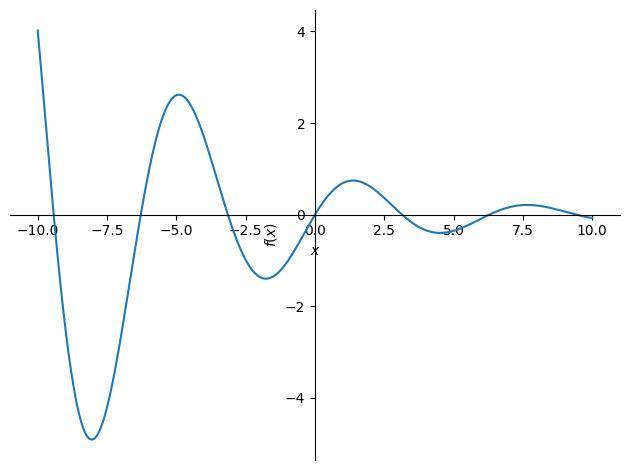

In [86]:

from sympy.plotting import plot

x = sp.symbols('x', real=True)
expr = sp.sin(x) * sp.exp(-x/5)

# Esto abre una ventana interactiva en algunos entornos; en notebooks suele mostrarse inline.
p = plot(expr, (x, -10, 10), show=True)


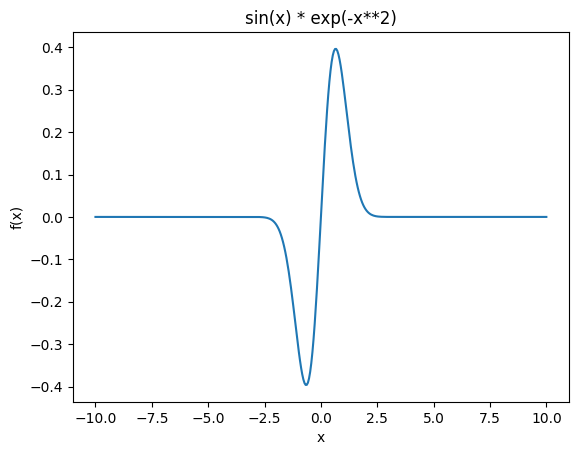

In [87]:

# Alternativa con matplotlib
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(-10, 10, 400)
ys = f_num(xs)

plt.figure()
plt.plot(xs, ys)
plt.title("sin(x) * exp(-x**2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()



## 15. Aritmética exacta, racionalización y precisión

- `Rational` para fracciones exactas.  
- `nsimplify` para aproximar con números racion ales/algebraicos.  
- Control de precisión con `evalf(n)`.


In [88]:

val = sp.nsimplify(3.1415926535)   # aproxima a una expresión "simple"
rat = sp.Rational(355, 113)        # aproximación clásica de pi
diff = abs(sp.N(sp.pi) - rat)
val, rat, diff


⎛6283185307  355                     ⎞
⎜──────────, ───, 2.66764189404967e-7⎟
⎝2000000000  113                     ⎠


## 16. `sympify` y análisis de cadenas

Convierte cadenas a expresiones simbólicas de forma segura.


In [89]:

expr_str = "sin(x)**2 + cos(x)**2"
expr = sp.sympify(expr_str)
expr, sp.simplify(expr)


⎛   2         2      ⎞
⎝sin (x) + cos (x), 1⎠


## 17. Sistemas de ecuaciones (no lineales)


In [90]:

x, y = sp.symbols('x y', real=True)
sol_sist = sp.solve((sp.Eq(x**2 + y, 5), sp.Eq(x - y, 1)), (x, y))
sol_sist


[(-3, -4), (2, 1)]


## 18. Conjuntos e intervalos simbólicos


In [91]:

A = sp.Interval(0, 2)
B = sp.Interval(1, 3)
A_union_B = A.union(B)
A_inter_B = A.intersect(B)
A_union_B, A_inter_B


([0, 3], [1, 2])


## 19. (Opcional) Unidades físicas con `sympy.physics.units`


In [92]:

from sympy.physics import units as u

dist = 5 * u.meter
time = 2 * u.second
vel = dist / time
vel.simplify()


5⋅meter 
────────
2⋅second


## 20. Consejos y buenas prácticas

- Usa **suposiciones** para guiar simplificaciones (por ejemplo, `positive=True`).  
- Prefiere **símbolos** y **expresiones exactas** (`Rational`) cuando busques resultados simbólicos.  
- Para desempeño numérico, emplea `lambdify` con **NumPy**.  
- Verifica resultados con casos de prueba y límites conocidos.  
- Imprime en **LaTeX** para documentación reproducible.  

*Última actualización:* 2025-08-31 18:42
